In [2]:
# %%

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, markers
from IPython.display import HTML
from numpy.core.fromnumeric import repeat
from celluloid import Camera
%matplotlib widget
plot = np.load('./checkpoints/plot990.npy.npz')
trajectory = np.load('./checkpoints/trajectory990.npy.npz')

Text(0, 0.5, 'Y')

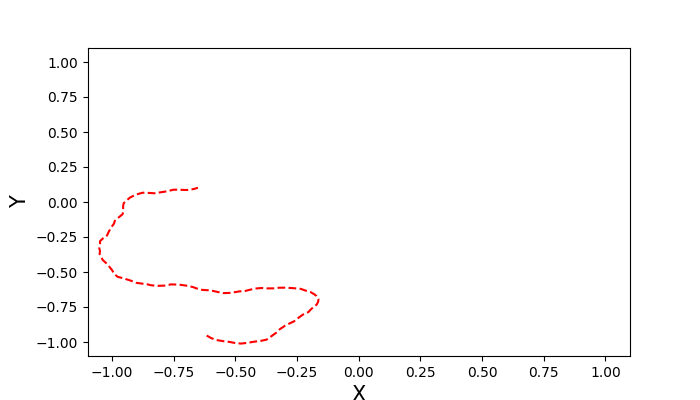

In [3]:
real_position = trajectory['arr_0']
predition_position = trajectory['arr_1']
fig, ax = plt.subplots(figsize=(7, 4))
pick_traj = 5
ax.plot(real_position[pick_traj][:, 0], real_position[pick_traj][:, 1], 'r--')
ax.set(xlim=[-1.1, 1.1], ylim=[-1.1, 1.1])
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)

In [4]:
camera = Camera(fig)
for j in range(1, real_position.shape[1]+1):
    x = real_position[pick_traj][0:j, 0]
    y = real_position[pick_traj][0:j, 1]
    x_pred = predition_position[pick_traj][0:j, 0]
    y_pred = predition_position[pick_traj][0:j, 1]
    ax.plot(x[-1], y[-1], marker='o', markersize=12,
            markeredgecolor='r', markerfacecolor='r')
    ax.plot(x, y, color='b', lw=2, linestyle='--')
    ax.plot(x_pred[-1], y_pred[-1], marker='o', markersize=12,
            markeredgecolor='g', markerfacecolor='g')
    ax.plot(x_pred, y_pred, color='y', lw=2, linestyle='--')
    ax.set(xlim=[-1.1, 1.1], ylim=[-1.1, 1.1])
    camera.snap()
anim=camera.animate(interval=200,repeat=True,repeat_delay=500)
HTML(anim.to_html5_video())